**CS Project - Calories Burnt Prediction Regression Model** 


XGBoost is a powerful approach for building supervised regression models. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. There are several metrics involved in regression like root-mean-squared error (RMSE) and mean-squared-error (MAE).

A) RMSE: It is the square root of mean squared error (MSE).
B) MAE: It is an absolute sum of actual and predicted differences, but it lacks mathematically, that’s why it is rarely used, as compared to other metrics.

1. Importing the Libraries

In [ ]:
import numpy as np                                   # arrays
import pandas as pd                                  # dataframes 
import matplotlib.pyplot as plt                      # plots 
import seaborn as sns                                # plots and graphs
from sklearn.model_selection import train_test_split # splitting the data 
from xgboost import XGBRegressor                     # XGBoost Regressor
from sklearn import metrics                          # metrics used to evaluate the model - MAE, RMSE
from yellowbrick.regressor import prediction_error   


2. Data Collection and Processing 

In [ ]:
calories = pd.read_csv('/content/calories.csv')   # loading the data from csv file to pandas data frame


In [ ]:
calories.head()  # print the first 5 rows of the data frame


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise = pd.read_csv('/content/exercise.csv')   # loading the data from csv file to pandas data frame

In [ ]:
exercise.head()  # print the first 5 rows of the data frame


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


The heart rate is the indirect measurement of intensity of the exercise that the person is doing. Hence based on this we can find the calories burnt 

3. Combining both the Data Frames

In [ ]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1) # concat is used for concatenation i.e joining the dataframes
                                                                    # axis = 1 is for adding data column wise

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_data.shape  # checking the number of rows and columns
                     # here there are 15000 rows i.e no.of people and 9 columns i.e different categories

(15000, 9)

In [ ]:
calories_data.info() # getting some information about the datatypes of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
calories_data.isnull().sum() # checking for missing values
                             # 0 means there are no missing values; data is complete

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

4. Data Analysis

In [ ]:
calories_data.describe()  # get some statistical measures about the data
                          # (mean, standard deviation, minimum, maximum, 25,50,75 percentile) of each column respectively
                          # if the heart rate & body temp is more then the person is doing exercise

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


5. Data Visualization

In [ ]:
sns.set() # it will give basic theme for the plots

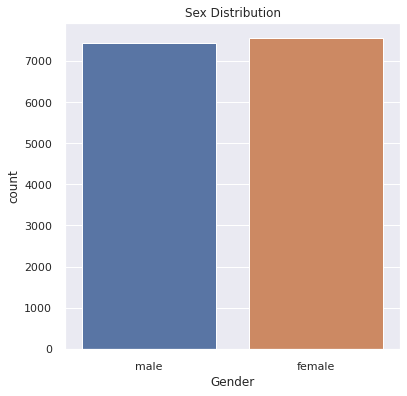

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=calories_data)
plt.title('Sex Distribution')
plt.show() # plotting the Gender column in count plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


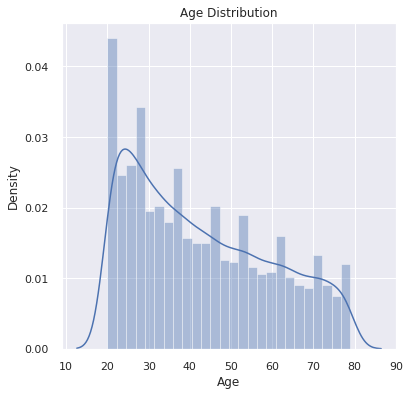

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Age'])
plt.title('Age Distribution')
plt.show()  # plotting the Age column in dist plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


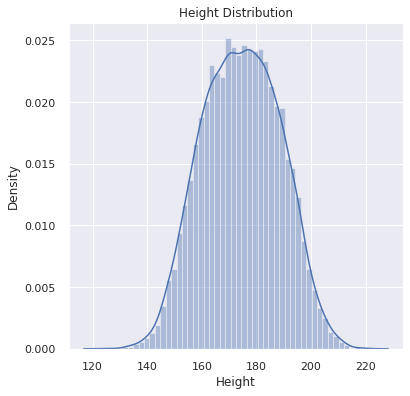

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Height'])
plt.title('Height Distribution')
plt.show()  # plotting the Height column in dist plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


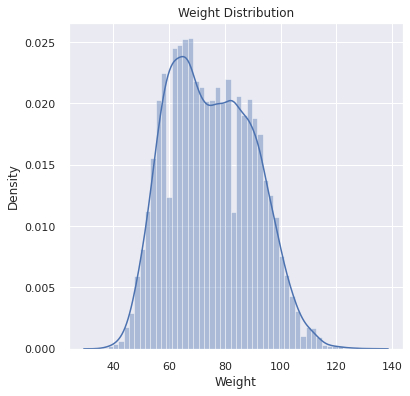

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Weight'])
plt.title('Weight Distribution')
plt.show()  # plotting the Weight column in count plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


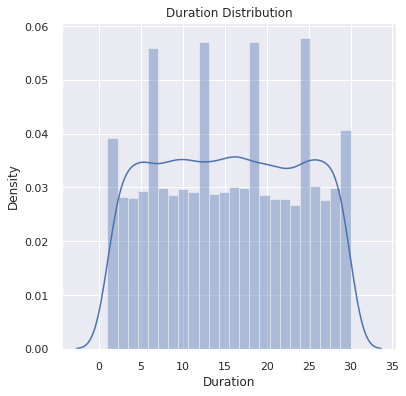

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Duration'])
plt.title('Duration Distribution')
plt.show()   # plotting the Duration column in count plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


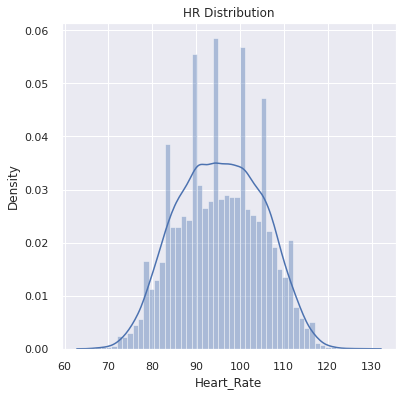

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Heart_Rate'])
plt.title('HR Distribution')
plt.show() # plotting the Heart rate column in count plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


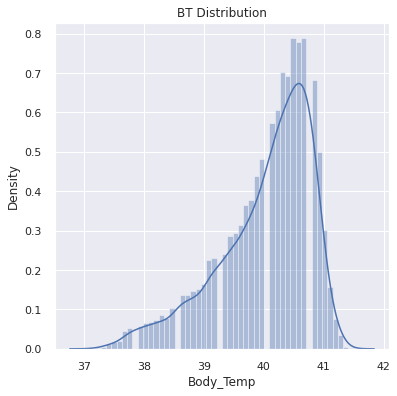

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Body_Temp'])
plt.title('BT Distribution')
plt.show()  # plotting the Body temperature column in count plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


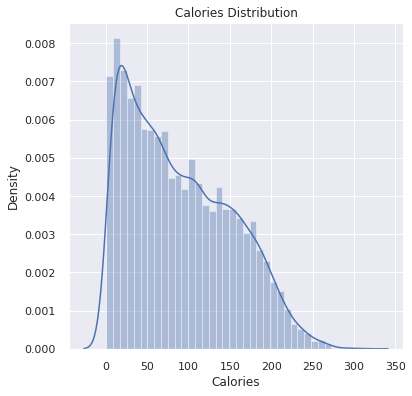

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(calories_data['Calories'])
plt.title('Calories Distribution')
plt.show()   # plotting the Calories column in count plot

6. Finding the Correlation in the Dataset

A) Positive Correlation 
B) Negative Correlation

In [ ]:
correlation = calories_data.corr()

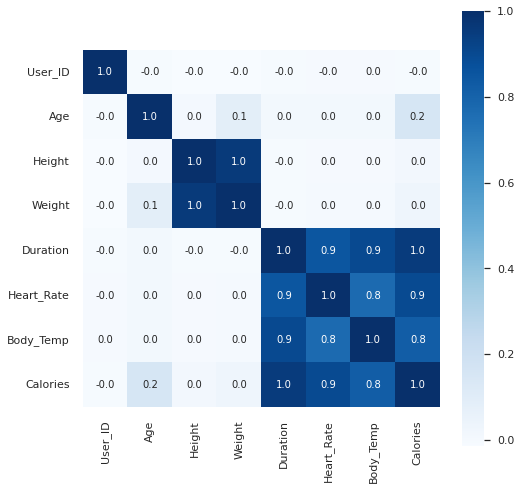

In [ ]:
plt.figure(figsize=(8,8))  # constructing a heatmap to understand the correlation
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues') 
# 1 means positive correlation and 0 means negative correlation
# Here, (Height,Weight), (Duration,Calories) are positively correlated whereas (Height,Age), (Weight,Heart rate) etc are negatively correlated


7. Coverting Text data to Numeric values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True) 
# replacing men,female to 0,1 (numeric values) as machine cannot understand texts

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


8. Separating Features -> (Categories) & Target -> (Calories)

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1) # drop is used to remove the columns
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


9. Splitting the data into Training Data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


10. Model Training

XGBoost Regression

In [ ]:
# loading the XGBoost Regression model
# Instantiate an XGBoost object with hyperparameters
model = XGBRegressor(max_depth=3, n_estimators=100, n_jobs=1,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=0, learning_rate=0.1)

1) max_depth=3: Here, the XGBoost uses decision trees as base learners. By setting max_depth=3, each tree will make 3 times of splits and stop there.
2) n_estimators=100: There are 100 trees in the ensemble.
3) objective=’reg:squarederror’: A name for the loss function used in our model. reg:squarederror is the standard option for regression in XGBoost. 
4) booster=’gbtree’: The ‘gbtree’ is the XGBoost default base learner. With booster=‘gbtree’, the XGBoost model uses decision trees, which is the best option for non-linear data.
5) n_jobs=2: Use 2 cores of the processor for doing parallel computations to run XGBoost.
6) random_state=1: Controls the randomness involved in creating trees. You may use any integer. By specifying a value for random_state, you will get the same result at different executions of your code.
7) learning_rate=0.05: Shrinks the weights of trees for each round of boosting. Decreasing learning_rate prevents overfitting.

In [ ]:
model.fit(X_train, Y_train)

[03:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(objectvie='reg:squarederror')

11. Model Evaluation

Prediction on Test **Data**

In [ ]:
test_data_prediction = model.predict(X_test) 
#testing X data (features of the data) which will find the number of calories different from the original data i.e Y_test

In [ ]:
print(test_data_prediction) #predicted calories values 

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


12. Mean Absolute Error

Comparing Y test and the test data predicted by using the metric -> Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae) #mean of the difference between aactual value and predicted value for each person. 

Mean Absolute Error =  2.7159012502233186


13. Mean Squared Error & Root Mean Squared Error

In [ ]:
MSE = metrics.mean_squared_error(Y_test, test_data_prediction)
RMSE = np.sqrt(MSE)

In [ ]:
print("Mean Squared Error = ", MSE)


Mean Squared Error =  14.506464988228966


In [ ]:
print("Root Mean Squared Error = ", RMSE)

Root Mean Squared Error =  3.8087353528735712



Prediction Error Plot


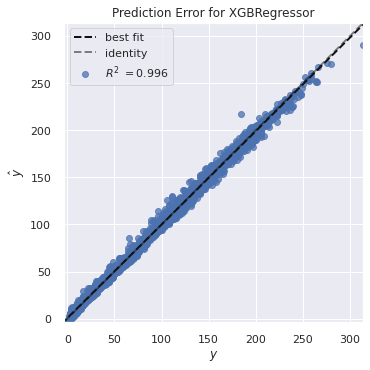

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f538880c9d0>,
                estimator=XGBRegressor(objectvie='reg:squarederror'))


In [ ]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(model, X_train, Y_train, X_test, Y_test))


**Our model returns an MAE value of ~ 2.71 and RMSE value of ~ 3.80 for the test data. Is that a good value? 
To find out, let’s look at some statistical measures of the target column (Calories).**

In [ ]:
calories_data.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Gender,15000.0,5.035333e-01,5.000042e-01,0.0,0.00,1.0,1.00,1.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


**With Mean and Standard Deviation to be 89.53 and 62.45 respectively, the RMSE value that we got is considered good (3.80). The smaller the MAE & RMSE value, the better is the fit of the model.**





**On average, the calories predictions of our model are 3 units away from the actual values.**